# Experiment

Generate the figure for "Parallel Order based Core maintenance"

### draw the figure of running time by varing the number of workers.

In [1]:
import csv
import numpy as np
import scipy.stats
import scipy as sp
import re
import matplotlib.pyplot as plt
import matplotlib
from tabulate import tabulate

ispdf = False
path = "../results/"
files = [
    "results-9-23-2022.csv",
    "results-9-30-2022.csv",
    "results-9-30-2022-temp.csv"
]

graph_name = [
    "livej",
    "patent", 
    "wikitalk",
    "roadNetCA",
    "dbpedia",
    "baidu",
    "pokec",
    "wiki_talk_en",
    "wiki-links",
    #"ssca2",
    # "com-friendster",
    # "twitter",
    # "twitter_mpi",
    "er-1m-8m",
    "ba-1m-8m",
    "rmat-1m-8m",
    "DBLP",
    "Flickr",
    "StackOverflow",
    "wiki-edits-sh",
]

# for stability test or scalability test
#selected_graph = {"wikitalk", "roadNetCA", "dbpedia", "ba-1m-8m"}

graph_title = [
    "livej",
    "patent",
    "wikitalk",
    "roadNet-CA",
    "dbpedia",
    "baidu", 
    "pokec",
    "wiki-talk-en",
    "wiki-links-en",
    #"ssca2",
    # "com-friendster",
    # "twitter",
    # "twitter-mpi",
    "ER",
    "BA",
    "RMAT",
    "DBLP",
    "flickr",
    "StackOverflow",
    "wiki-edits-sh"
]


workers = ["1", "2", "4", "8", "16", "32", "64"]

g_x = [1, 2, 4, 8, 16, 32, 64]
data = [] # load all data in csv files

def read_data():
    global data
    data = []
    for p in files:
        p = path + p
        f = open(p,'rt')
        reader = csv.DictReader(f)
        for row in reader:
            data.append(row)
        f.close()

4
True
[1806.531053, 1825.114791, 1842.909751, 1827.509198, 1828.790012, 1775.679696, 1776.925465, 1784.255295, 1803.899888, 1774.807598, 1806.88975, 1800.103993, 1801.551739, 1810.803901, 1802.548618, 1815.822174, 1817.870305, 1813.433084, 1816.583705, 1816.395157, 1806.97195, 1816.937984, 1812.973433, 1829.150928, 1866.710087, 1812.478611, 1832.980947, 1812.706727, 1807.988785, 1811.20511, 1816.607393, 1787.618982, 1817.78805, 1818.908017, 1790.276826, 1808.952943, 1811.730736, 1818.221037, 1820.570323, 1806.552085, 1793.636851, 1816.895651, 1810.966396, 1816.826594, 1817.931739]

4
False
[1838.859789, 1821.268757, 1809.273417, 1815.945707, 1817.739124, 1804.004807, 1801.187507, 1805.192595, 1810.135622, 1808.527306, 1807.520117, 1815.883081, 1809.830246, 1806.349614, 1809.416528, 1805.236322, 1809.695821, 1808.867122, 1809.948645, 1814.189392, 1808.382575, 1811.172366, 1809.47174, 1823.153876, 1811.732526, 1809.204368, 1809.311742, 1808.51737, 1808.207726, 1807.109688, 1808.731343, 

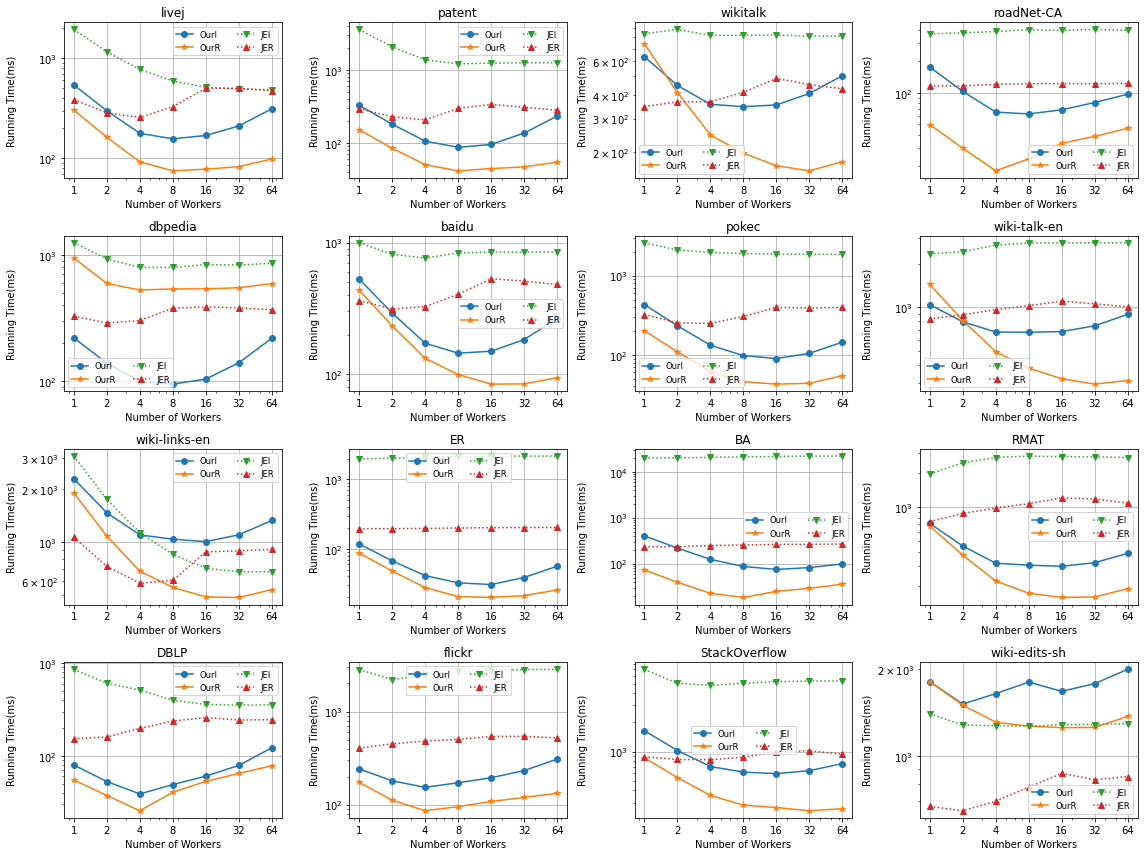

In [27]:

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return round(m, 2), round(h, 2), round(h, 2)

def parse_data_time(model, worker, alg, isInsert):
    global data
    localtimes = []
    for row in data:
        if model != row["model"]: continue
        if worker != row["workers"]: continue
        if alg == "4": 
            if isInsert and row["insert-num"] != "0": 
                if row["mstime"] != "-1": localtimes.append(float(row["mstime"]))
            if not isInsert and row["remove-num"] != "0":
                if row["mstime"] != "-1":localtimes.append(float(row["mstime"]))
        if alg == "41":
            if isInsert and row["Insert"] != "-1": 
                localtimes.append(float(row["Insert"]))
            if not isInsert and row["Delete"] != "-1":
                localtimes.append(float(row["Delete"]))
    if model == "wiki-edits-sh" and worker == "1": 
        print(alg); print(isInsert)
        print(localtimes); print("")
    if len(localtimes) != 0 : 
        return mean_confidence_interval(localtimes)
    else: assert("data not find!")
    
# draw the running time by varying the number of workers
def draw_running_time_by_worker_number():
    global graph_name; global graph_title; global g_x
    index = 1
    fig = plt.figure(figsize=(16, 12))

    for model, title in zip(graph_name, graph_title):
        ax = fig.add_subplot(4, 4, index); index += 1
        y1 = []; y2 = []; y3 = []; y4 = []
        y1err = []
        x = g_x
        for w in workers:
            r1 = parse_data_time(model, w, "4", True); y1.append(r1[0]); y1err.append(r1[1]) #our insert
            r2 = parse_data_time(model, w, "4", False); y2.append(r2[0]) #our remove
            r3 = parse_data_time(model, w, "41", True); y3.append(r3[0]) # other insert
            r4 = parse_data_time(model, w, "41", False); y4.append(r4[0]) # other remove
        #print(x); print(y2)
        ax.plot(x, y1, label="OurI", marker="o", ); #plt.yscale("log")
        #ax.errorbar(x, y1, yerr = y1err, label="OurI", marker="o")
        ax.plot(x, y2, label="OurR", marker="*"); #plt.yscale("log")
        ax.plot(x, y3, label="JEI", marker="v", linestyle='dotted'); #plt.yscale("log")
        ax.plot(x, y4, label="JER", marker="^", linestyle='dotted'); #plt.yscale("log")
        
        # y1=[]; y2 = []
        # r1 = parse_data_time(model, "0", "4", True); y1.append(r1[0]); y1 += 6 * y1
        # r2 = parse_data_time(model, "0", "4", False); y2.append(r2[0]); y2 += 6 *y2
        # ax.plot(x, y1, marker = "o")
        # ax.plot(x, y2)
        
        ax.grid()
        ax.legend(fontsize="small", ncol=2)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_title(title)
        ax.set_xticks(g_x, x) 
        
        ax.set_xlabel("Number of Workers")
        
        ax.set_ylabel("Running Time(ms)")
    fig.align_labels()
    fig.tight_layout()
     
    plt.savefig("par-cm-running-time.pdf", bbox_inches='tight')
    plt.show()  

read_data(); draw_running_time_by_worker_number()

### draw the speedup table

In [3]:
# draw the table of running time speedups 
# 1 worker(sequential) 16 workers running time (ms) for both methods show speedups.
# draw the running time by varying the number of workers
def draw_running_time_speedup_table():
    global graph_name; global graph_title
    lines = []
    for model, title in zip(graph_name, graph_title):
        line = [title]
        w = "1"
        r1 = parse_data_time(model, w, "4", True); 
        r2 = parse_data_time(model, w, "4", False); #our remove
        r3 = parse_data_time(model, w, "41", True);  # other insert
        r4 = parse_data_time(model, w, "41", False);  # other remove
        
        w = "16"
        s1 = parse_data_time(model, w, "4", True); #our insert
        s2 = parse_data_time(model, w, "4", False); #our remove
        s3 = parse_data_time(model, w, "41", True);  # other insert
        s4 = parse_data_time(model, w, "41", False);  # other remove
        
        #speedup 16 workers vs 1 worker
        speedup = str(round(r1[0]/s1[0], 1)); line.append(speedup) # ourI
        speedup = str(round(r2[0]/s2[0], 1)); line.append(speedup) # ourR
        speedup = str(round(r3[0]/s3[0], 1)); line.append(speedup) # JEI
        speedup = str(round(r4[0]/s4[0], 1)); line.append(speedup) #JER
        
           #speedup 1 worker our vs JE
        speedup = str(round(r3[0]/r1[0], 1)); line.append(speedup) #ourI 
        speedup = str(round(r4[0]/r2[0], 1)); line.append(speedup) #ourR 
        
        #speedup 16 worker our vs JE
        speedup = str(round(s3[0]/s1[0], 1)); line.append(speedup) #ourI 
        speedup = str(round(s4[0]/s2[0], 1)); line.append(speedup) #ourR 
        
        
        lines.append(line)
        #print(line)
        
    print(tabulate(lines)) 
    
    for i in range(1, 9): #colum
        min = 1000.0; max = 0.0; min_idx = -1; max_idx = -1
        for j in range(16): #row
            a = float(lines[j][i])
            if i == 1: print(a)
            if a < min: min = a; min_idx = j
            if a > max: max = a; max_idx = j
        # print(min_idx); 
        # print(max_idx);
        lines[min_idx][i] = "\\textbf{" + lines[min_idx][i] + "}"
        lines[max_idx][i] = "\\textbf{" + lines[max_idx][i] + "}"
        
    for line in lines: print(" & ".join(line) + " \\\\")
        
    print("")
    print("")    
draw_running_time_speedup_table()  

4
True
[1806.531053, 1825.114791, 1842.909751, 1827.509198, 1828.790012, 1775.679696, 1776.925465, 1784.255295, 1803.899888, 1774.807598, 1806.88975, 1800.103993, 1801.551739, 1810.803901, 1802.548618, 1815.822174, 1817.870305, 1813.433084, 1816.583705, 1816.395157, 1806.97195, 1816.937984, 1812.973433, 1829.150928, 1866.710087, 1812.478611, 1832.980947, 1812.706727, 1807.988785, 1811.20511, 1816.607393, 1787.618982, 1817.78805, 1818.908017, 1790.276826, 1808.952943, 1811.730736, 1818.221037, 1820.570323, 1806.552085, 1793.636851, 1816.895651, 1810.966396, 1816.826594, 1817.931739]

4
False
[1838.859789, 1821.268757, 1809.273417, 1815.945707, 1817.739124, 1804.004807, 1801.187507, 1805.192595, 1810.135622, 1808.527306, 1807.520117, 1815.883081, 1809.830246, 1806.349614, 1809.416528, 1805.236322, 1809.695821, 1808.867122, 1809.948645, 1814.189392, 1808.382575, 1811.172366, 1809.47174, 1823.153876, 1811.732526, 1809.204368, 1809.311742, 1808.51737, 1808.207726, 1807.109688, 1808.731343, 

### Vcolor Size Figure
thsi is to show the size of locked vertices for each insertion or removal. 

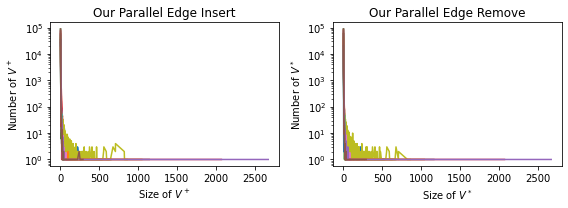

In [4]:
## draw Vcolor size figure 
file_paths = ["/home/guob15/test-graph/test/", "/home/guob15/test-graph/test-temporal/"]
file_path = "/home/guob15/test-graph/test/"
def read_graph_Vcolor_size(name, isInsert):
    global file_path
    path = ""
    if isInsert: path = file_path + name + ".bin.I-Vcolor-100000"
    else: path = file_path + name + ".bin.R-Vcolor-100000"
    
    x = []; y = []
    f = open(path,'rt')
    for line in f:
        l = line.split(",")
        x.append(int(l[0]))
        y.append(int(l[1]))
    f.close()
    return x, y

def accumulate(y):
    y2 = []
    a = 0
    for x in y:
        a += x
        y2.append(a)
    return y2
    
def draw_graph_Vcolor_size_figure():
    global graph_name; global graph_title
    index = 1
    time = 0
    fig = plt.figure(figsize=(8, 3))
    
    
    ax = fig.add_subplot(1, 2, index); index += 1
    for name,title in zip(graph_name, graph_title): 
        total_num = 0; num_10 = 0; num_result = []
        
        x1 = []; y1 = []
        x1, y1 = read_graph_Vcolor_size(name, True)
        for x, y in zip(x1, y1):
            total_num += y
            if x <=10: num_10 += y
        num_result.append(round(num_10/total_num, 2));
        #print(num_result)
        
        #y1 = accumulate(y1)
        ax.plot(x1, y1);
    #ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Size of $V^+$")
    ax.set_ylabel("Number of $V^+$")
    ax.set_title("Our Parallel Edge Insert")
    
    ax = fig.add_subplot(1, 2, index); index += 1
    for name,title in zip(graph_name, graph_title): 
        total_num = 0; num_10 = 0; num_result = []
        
        x1 = []; y1 = []
        x1, y1 = read_graph_Vcolor_size(name, False)
        for x, y in zip(x1, y1):
            total_num += y
            if x <=10: num_10 += y
        num_result.append(round(num_10/total_num, 2));
        #print(num_result)
        
        ax.plot(x1, y1);
    #ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Size of $V^*$")
    ax.set_ylabel("Number of $V^*$")
    ax.set_title("Our Parallel Edge Remove")
    
        
    fig.align_labels()
    fig.tight_layout()
    global ispdf
    plt.savefig("Vcolor.pdf", bbox_inches='tight')
    plt.show();
    
draw_graph_Vcolor_size_figure() # plot all in one figure. 

### scalability evaluation

/home/guob15/.local/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/guob15/.local/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/guob15/.local/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/guob15/.local/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/guob15/.local/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/guob15/.local/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning

['100000', '200000', '300000', '400000', '500000', '600000', '700000', '800000', '900000', '1000000']
[170.11, 288.81, 443.98, 556.03, 674.57, 801.45, 962.63, 1060.99, 1178.58, 1378.35]
[76.54, 145.44, 220.17, 279.92, 349.24, 403.97, 478.81, 535.23, 600.62, 667.69]
[587.33, 765.79, 1023.89, 1409.58, 1764.64, 2240.43, 3656.77, 3773.94, 5248.35, 4298.3]
[561.22, 1009.63, 1428.51, 2025.24, 2548.67, 3039.0, 3738.32, 4251.19, 4657.62, 5199.95]
3.1184387129538944
7.787970465335709
['100000', '200000', '300000', '400000', '500000', '600000', '700000', '800000', '900000', '1000000']
[149.63, 457.07, 620.5, 1100.19, 1244.17, 1807.79, 2107.69, 2976.87, 3518.24, 2989.69]
[85.31, 239.98, 305.71, 425.58, 520.96, 656.63, 716.32, 847.02, 921.91, 1059.2]
[902.53, 1628.9, 2188.87, 2587.54, 2863.64, 3289.95, 3774.99, 4379.76, 4521.06, 5073.78]
[570.5, 1161.47, 1674.19, 2240.91, 2907.31, 3518.77, 3960.93, 4670.65, 5142.86, 5733.18]
1.6970923406774614
5.4127454682779454
['100000', '200000', '300000', '400

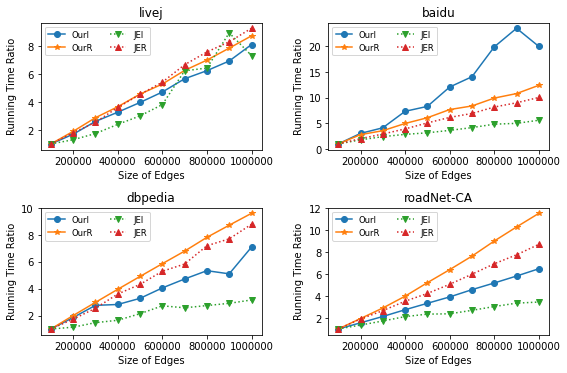

In [5]:
files = [
    "results-10-4-2022-size.csv" #T5 the average running time for repeated random graphs.
]

select_graph_name = [
    "livej",
    "baidu",
    "dbpedia",
    #"pokec",
    "roadNetCA"
]

# for stability test or scalability test
#selected_graph = {"wikitalk", "roadNetCA", "dbpedia", "ba-1m-8m"}

select_graph_title = [
    "livej",
    "baidu", 
     "dbpedia",
    "roadNet-CA",
]

# graph_name = [
#     "livej",
#     "patent", 
#     "wikitalk",
#     "roadNetCA",
#     "dbpedia",
#     "baidu",
#     "pokec",
#     "wiki_talk_en",
#     "wiki-links",
#     #"ssca2",
#     # "com-friendster",
#     # "twitter",
#     # "twitter_mpi",
#     "er-1m-8m",
#     "ba-1m-8m",
#     "rmat-1m-8m",
#     "DBLP",
#     "Flickr",
#     "StackOverflow",
#     "wiki-edits-sh",
# ]

# # for stability test or scalability test
# #selected_graph = {"wikitalk", "roadNetCA", "dbpedia", "ba-1m-8m"}

# graph_title = [
#     "livej",
#     "patent",
#     "wikitalk",
#     "roadNet-CA",
#     "dbpedia",
#     "baidu", 
#     "pokec",
#     "wiki-talk-en",
#     "wiki-links-en",
#     #"ssca2",
#     # "com-friendster",
#     # "twitter",
#     # "twitter-mpi",
#     "ER",
#     "BA",
#     "RMAT",
#     "DBLP",
#     "flickr",
#     "StackOverflow",
#     "wiki-edits-sh"
# ]


def parse_data_time_size(model, worker, alg, size, isInsert):
    global data
    localtimes = []
    for row in data:
        if model != row["model"]: continue
        if worker != row["workers"]: continue
        if alg == "4": 
            if isInsert and row["insert-num"] != "0": 
                if size != row["insert-num"]: continue
                if row["mstime"] != "-1": localtimes.append(float(row["mstime"]))
            if not isInsert and row["remove-num"] != "0":
                if size != row["remove-num"]: continue
                if row["mstime"] != "-1":localtimes.append(float(row["mstime"]))
        if alg == "41":
            if isInsert and row["Insert"] != "-1": 
                if size != row["insert-num"]: continue 
                localtimes.append(float(row["Insert"]))
            if not isInsert and row["Delete"] != "-1":
                if size != row["remove-num"]: continue
                localtimes.append(float(row["Delete"]))
    # if model == "baidu" and worker == "16": 
    #     print(alg); print(isInsert)
    #     print(localtimes); print("")
    if len(localtimes) != 0 : 
        return mean_confidence_interval(localtimes)
    else: assert("data not find!")
    
   
#draw the running time by varying the number of workers
def draw_running_time_by_size(isRatio):
    g_sizes = ["100000", "200000", "300000", "400000", "500000", "600000", "700000", "800000", "900000", "1000000"]
    g_xticks = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "$10 x 10^5$"]

    global graph_name; global graph_title; global g_x;
    global select_graph_name; global select_graph_title; 
    index = 1
    fig = plt.figure(figsize=(8, 10))
    #fig = plt.figure(figsize=(8, 2.5))
    
    for model, title in zip(select_graph_name, select_graph_title):
        ax = fig.add_subplot(4, 2, index); 
        #ax = fig.add_subplot(1, 2, index); 
        index += 1
        y1 = []; y2 = []; y3 = []; y4 = []
        y11=[]; y12=[]; y13=[]; y14=[]
        w = "16"
        
        size = "100000"
        r1 = parse_data_time_size(model, w, "4", size, True); z1 = (r1[0]); 
        r2 = parse_data_time_size(model, w, "4", size, False); z2 = (r2[0]) #our remove
        r3 = parse_data_time_size(model, w, "41", size, True); z3 = (r3[0]) # other insert
        r4 = parse_data_time_size(model, w, "41", size, False); z4 = (r4[0]) # other remove
            
            
        x = g_sizes

        for size in g_sizes:
            r1 = parse_data_time_size(model, w, "4", size, True); y1.append(float(r1[0])/float(z1)); 
            r2 = parse_data_time_size(model, w, "4", size, False); y2.append(float(r2[0])/float(z2)) #our remove
            r3 = parse_data_time_size(model, w, "41", size, True); y3.append(float(r3[0])/float(z3)) # other insert
            r4 = parse_data_time_size(model, w, "41", size, False); y4.append(float(r4[0])/float(z4)) # other remove      
        
            r1 = parse_data_time_size(model, w, "4", size, True); y11.append(float(r1[0])); 
            r2 = parse_data_time_size(model, w, "4", size, False); y12.append(float(r2[0])) #our remove
            r3 = parse_data_time_size(model, w, "41", size, True); y13.append(float(r3[0])) # other insert
            r4 = parse_data_time_size(model, w, "41", size, False); y14.append(float(r4[0])) # other remove
    
        print(x); print(y11); print(y12); print(y13); print(y14)
        i = 9
        print(y13[i]/y11[i]);
        print(y14[i]/y12[i]);
        
        ax.plot(x, y1, label="OurI", marker="o", ); #plt.yscale("log")
        #ax.errorbar(x, y1, yerr = y1err, label="OurI", marker="o")
        ax.plot(x, y2, label="OurR", marker="*"); #plt.yscale("log")
        ax.plot(x, y3, label="JEI", marker="v", linestyle='dotted'); #plt.yscale("log")
        ax.plot(x, y4, label="JER", marker="^", linestyle='dotted'); #plt.yscale("log")
        
        # y1=[]; y2 = []
        # r1 = parse_data_time(model, "0", "4", True); y1.append(r1[0]); y1 += 6 * y1
        # r2 = parse_data_time(model, "0", "4", False); y2.append(r2[0]); y2 += 6 *y2
        # ax.plot(x, y1, marker = "o")
        # ax.plot(x, y2)
        
        ax.legend(fontsize="small", ncol=2)
        #ax.set_xscale("log")
        #ax.set_yscale("log")
        ax.set_title(title)
        #ax.set_xticks(g_sizes, x) 
        #ax.set_xticks(range(10), g_xticks)
        ax.set_xticks([1,3,5, 7,9])
        
        ax.set_xlabel("Size of Edges")
        if isRatio: ax.set_ylabel("Running Time Ratio")
        else: ax.set_ylabel("Running Time(ms)")
        
                    
    fig.align_labels()
    fig.tight_layout()
     
    plt.savefig("par-cm-time-size.pdf", bbox_inches='tight')
    plt.show()  

read_data(); draw_running_time_by_size(True); #draw_running_time_by_size(False);



### stability evaluation


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[154.267212, 162.428489, 168.222768, 162.636565, 178.804366, 167.998603, 167.675164, 167.28649, 176.374546, 164.110152, 165.075969, 172.458665, 169.216854, 170.429753, 164.174667, 157.047482, 168.205255, 172.651269, 159.332358, 162.987491, 161.518832, 163.321068, 163.329342, 182.49004, 168.108671, 163.840849, 163.980013, 163.0339, 167.851458, 170.903338, 162.222928, 160.614325, 161.316114, 173.429189, 161.626292, 162.576105, 165.873771, 164.579423, 174.354569, 163.741996, 166.202013, 174.47369, 152.635485, 162.57214, 171.879348, 154.859543, 162.297562, 171.781293, 175.95202, 168.943475]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[127.189831, 131.93032

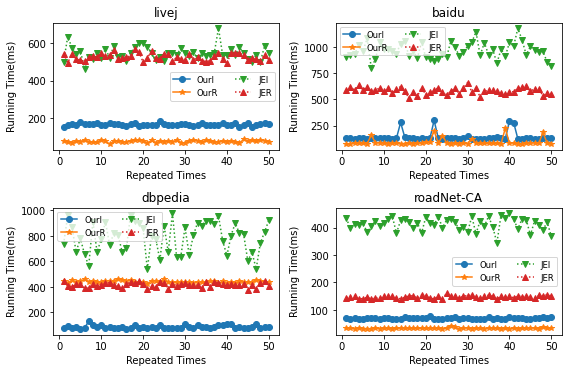

In [19]:
#draw the running time by varying the number of workers
files = [
    "results-10-7-2022-stability.csv" #T5 the average running time for repeated random graphs.
]

select_graph_name = [
    "livej",
    "baidu",
    "dbpedia",
    #"pokec",
    "roadNetCA"
]

# for stability test or scalability test
#selected_graph = {"wikitalk", "roadNetCA", "dbpedia", "ba-1m-8m"}

select_graph_title = [
    "livej",
    "baidu", 
     "dbpedia",
    "roadNet-CA",
]

def parse_data_time_stability(model, worker, alg, size, isInsert):
    global data
    localtimes = []
    for row in data:
        if model != row["model"]: continue
        if worker != row["workers"]: continue
        if alg == "4": 
            if isInsert and row["insert-num"] != "0": 
                if size != row["insert-num"]: continue
                if row["mstime"] != "-1": localtimes.append(float(row["mstime"]))
            if not isInsert and row["remove-num"] != "0":
                if size != row["remove-num"]: continue
                if row["mstime"] != "-1":localtimes.append(float(row["mstime"]))
        if alg == "41":
            if isInsert and row["Insert"] != "-1": 
                if size != row["insert-num"]: continue 
                localtimes.append(float(row["Insert"]))
            if not isInsert and row["Delete"] != "-1":
                if size != row["remove-num"]: continue
                localtimes.append(float(row["Delete"]))
    # if model == "baidu" and worker == "16": 
    #     print(alg); print(isInsert)
    #     print(localtimes); print("")
    return localtimes

def draw_running_time_stability():
    global graph_name; global graph_title; global g_x; global g_sizes
    global select_graph_name; global select_graph_title; global g_xticks
    index = 1
    fig = plt.figure(figsize=(8, 10))
    #fig = plt.figure(figsize=(8, 2.5))
    
    for model, title in zip(select_graph_name, select_graph_title):
        ax = fig.add_subplot(4, 2, index); 
        #ax = fig.add_subplot(1, 2, index); 
        index += 1
        y1 = []; y2 = []; y3 = []; y4 = []
        y11=[]; y12=[]; y13=[]; y14=[]
        w = "16"
        
        size = "100000"
     
        r1 = parse_data_time_stability(model, w, "4", size, True)  #our insert
        r2 = parse_data_time_stability(model, w, "4", size, False) #our remove
        r3 = parse_data_time_stability(model, w, "41", size, True) # other insert
        r4 = parse_data_time_stability(model, w, "41", size, False) # other remove   
            
        
        y1 = r1[0:50]
        y2 = r2[0:50]
        y3 = r3[0:50]
        y4 = r4[0:50]
        x = list(range(1, 51))
   
        print(x); print(y1)
        ax.plot(x, y1, label="OurI", marker="o", ); #plt.yscale("log")
        #ax.errorbar(x, y1, yerr = y1err, label="OurI", marker="o")
        ax.plot(x, y2, label="OurR", marker="*"); #plt.yscale("log")
        ax.plot(x, y3, label="JEI", marker="v", linestyle='dotted'); #plt.yscale("log")
        ax.plot(x, y4, label="JER", marker="^", linestyle='dotted'); #plt.yscale("log")
        

        
        ax.legend(fontsize="small", ncol=2)
        #ax.set_xscale("log")
        #ax.set_yscale("log")
        ax.set_title(title)
        #ax.set_xticks(g_sizes, x) 
        #ax.set_xticks(range(10), g_xticks)
        
        
        ax.set_xlabel("Repeated Times")
        ax.set_ylabel("Running Time(ms)")
        
                    
    fig.align_labels()
    fig.tight_layout()
     
    plt.savefig("par-cm-time-stability.pdf", bbox_inches='tight')
    plt.show()  
read_data(); draw_running_time_stability()